<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colours" data-toc-modified-id="Colours-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colours</a></span></li><li><span><a href="#Import-UKCTOCS-sample-information" data-toc-modified-id="Import-UKCTOCS-sample-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import UKCTOCS sample information</a></span></li><li><span><a href="#Timings-of-UKCTOCS-pre-AML-(C92.0)-samples" data-toc-modified-id="Timings-of-UKCTOCS-pre-AML-(C92.0)-samples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Timings of UKCTOCS pre-AML (C92.0) samples</a></span><ul class="toc-item"><li><span><a href="#Extended-Data-Figure-1" data-toc-modified-id="Extended-Data-Figure-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extended Data Figure 1</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [30]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

In [4]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Helvetica'

# Colours

In [18]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list = [c1, c3, c4, c5, c6, c7, c8, c9]

# Lists of colors for plots
def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))

In [20]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

# Import UKCTOCS sample information

In [11]:
def convert_to_year_range(years):
    if 0 < years < 0.5:
        year_interval = 0.25
    elif 0.5 <= years < 1:
        year_interval = 0.75
    else:
        year_interval = int(years)+0.5
    
    return -year_interval

In [13]:
#create a dictionary of the sample details
cases = {} #e.g. {'C92_002': ['C92_002_s1', 'C92_002_s2', 'C92_002_s3', 'C92_002_s4'....]}
controls = {} #e.g. {'CNTRL_001': ['CNTRL_001_s1', 'CNTRL_001_s10', 'CNTRL_001_s2'...]}
cases_and_controls = {}
sample_ages = {} #e.g. {'C92_002_s1': 73.73, 'C92_002_s2': 75.0, 'C92_002_s3': 75.83...}
sample_diagnosis_age = {} #e.g. {'C92_002': 81.1, 'C92_003': 75.21, 'C92_005': 70.09...}
sample_DNA_amount = {} #e.g. {'C92_002_s1': '45', 'C92_002_s2': '50', 'C92_002_s3': '50'...}
matched_sample = {} #e.g. {'C92_002': 'CNTRL_169', 'C92_003': 'CNTRL_002'...}
time_to_diagnosis = {}

with open('Data_files/UKCTOCS_samples_processed_information.csv') as csvfile:
    readreader = csv.reader(csvfile)
    row_count=0
    for row in readreader:
        if row_count>0:
            sample_name = row[1].split('_')[0]+'_'+row[1].split('_')[1]
            timepoint = row[1]
            sample_ages[timepoint]=float(row[6])
            sample_DNA_amount[timepoint]=row[2]
            pre_diagnosis = row[3]
            if row[7]!='':
                if '_' in row[7]:
                    matched_sample_name = row[7].split('_')[0]+'_'+row[7].split('_')[1]
                    matched_sample[sample_name]=matched_sample_name
                    
            if sample_name in cases_and_controls.keys():
                cases_and_controls[sample_name].append(timepoint)
            else:
                cases_and_controls[sample_name]=[timepoint]
                    
            if row[0]=='Case':
                if sample_name in cases.keys():
                    cases[sample_name].append(timepoint)
                else:
                    cases[sample_name]=[timepoint]
                    
                sample_diagnosis_age[sample_name]=float(row[5])
                
                years_pre_diagnosis_interval = convert_to_year_range(float(pre_diagnosis)/12)
                
                if sample_name in time_to_diagnosis.keys():
                    time_to_diagnosis[sample_name].append(years_pre_diagnosis_interval)
                else:
                    time_to_diagnosis[sample_name]=[years_pre_diagnosis_interval]
                
            if row[0]=='Control':
                if sample_name in controls.keys():
                    controls[sample_name].append(timepoint)
                else:
                    controls[sample_name]=[timepoint]
                if sample_name in matched_sample.keys():
                    sample_diagnosis_age[sample_name]=sample_diagnosis_age[matched_sample[sample_name]]

        row_count+=1
        
cases_and_controls_sorted = {}
for k, v in cases_and_controls.items():
    ages_sorted = []
    for i in v:
        timepoint_number = int(i.split('_')[2][1:])
        ages_sorted.append((timepoint_number, i))
    sorted_v = sorted(ages_sorted, reverse = False)
    cases_and_controls_sorted[k]=[]
    for i in sorted_v:
        cases_and_controls_sorted[k].append(i[1])
        
# cases_and_controls_sorted

In [14]:
sorted_times_to_diagnosis = {}
for k, v in time_to_diagnosis.items():
    sorted_times = sorted(v)
    sorted_times_to_diagnosis[k]=[len(sorted_times), sorted_times, sample_diagnosis_age[k], matched_sample[k]]

sorted_times_to_diagnosis_length = {k: v for k, v in sorted(sorted_times_to_diagnosis.items(), key=lambda item: item[1])}

sorted_times_to_diagnosis_length

{'C92_090': [2, [-14.5, -6.5], 66.24, 'CNTRL_167'],
 'C92_088': [2, [-13.5, -11.5], 67.04, 'CNTRL_122'],
 'C92_067': [2, [-7.5, -6.5], 78.02, 'CNTRL_171'],
 'C92_070': [2, [-5.5, -4.5], 72.29, 'CNTRL_201'],
 'C92_068': [2, [-4.5, -3.5], 67.29, 'CNTRL_187'],
 'C92_072': [2, [-3.5, -1.5], 74.18, 'CNTRL_198'],
 'C92_066': [2, [-2.5, -1.5], 67.58, 'CNTRL_193'],
 'C92_065': [2, [-2.5, -0.75], 72.01, 'CNTRL_200'],
 'C92_061': [3, [-10.5, -9.5, -7.5], 74.14, 'CNTRL_180'],
 'C92_062': [3, [-5.5, -4.5, -3.5], 72.7, 'CNTRL_175'],
 'C92_063': [3, [-3.5, -2.5, -1.5], 58.56, 'CNTRL_195'],
 'C92_055': [3, [-2.5, -1.5, -0.75], 53.0, 'CNTRL_174'],
 'C92_064': [3, [-2.5, -1.5, -0.75], 70.15, 'CNTRL_173'],
 'C92_042': [4, [-10.5, -9.5, -8.5, -7.5], 81.31, 'CNTRL_185'],
 'C92_057': [4, [-9.5, -5.5, -3.5, -3.5], 75.51, 'CNTRL_168'],
 'C92_050': [4, [-6.5, -5.5, -4.5, -2.5], 77.25, 'CNTRL_190'],
 'C92_047': [4, [-6.5, -4.5, -1.5, -1.5], 77.75, 'CNTRL_166'],
 'C92_054': [4, [-4.5, -3.5, -1.5, -0.25], 72.38,

# Timings of UKCTOCS pre-AML (C92.0) samples

## Extended Data Figure 1

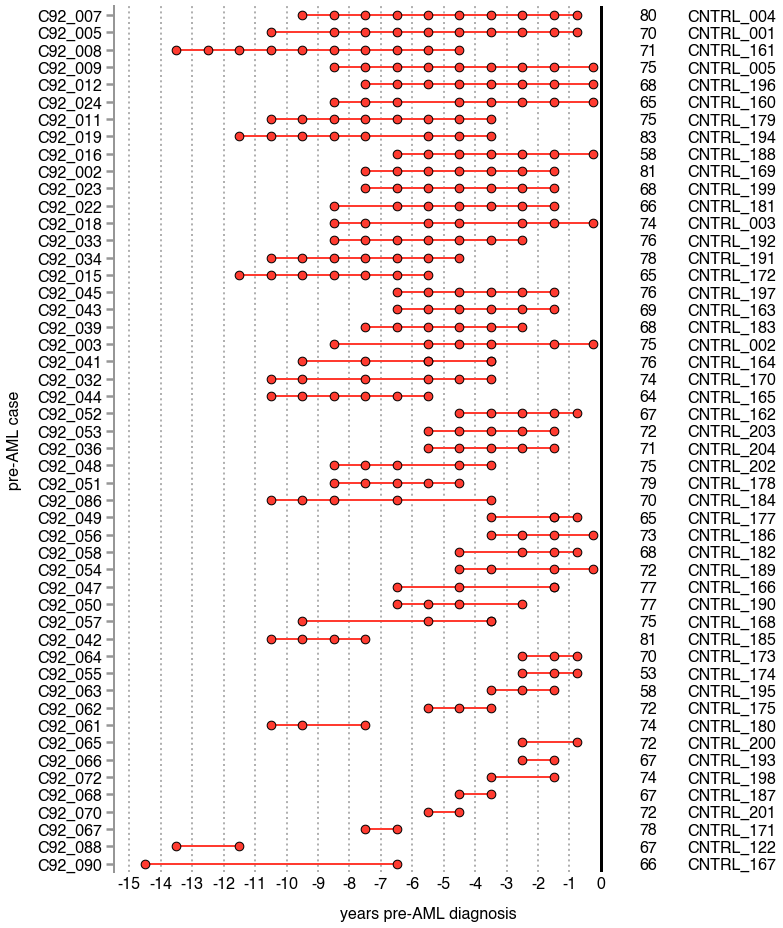

total samples =  262


In [21]:
# Plots of C920 (Acute Myeloid Leukaemia)
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(11, 13))

helvetica_6 = 16
m_size=75
zo=1
zo1=2
w=1.5
height=0

#plot the diagnosis line
x0=[0 for i in range(-10,225)]
y0=[i for i in range(-10,225)]
ax1.plot(x0,y0, color='k', linewidth=3, alpha=1, zorder=4)

total_samples = 0
samples_per_person = []
diagnosis_ages = []

#plot the sample time-points
n = 1
for sample_name, timings in sorted_times_to_diagnosis_length.items():
    years = timings[1]
    diagnosis_age = timings[2]
    diagnosis_ages.append(diagnosis_age)
    matched_control = timings[3]
    y = [sample_name for i in range(0, len(years))]
#     print(n)
#     print(years)
    total_samples_each_person = 0
    for year in years:
        total_samples+=1
        total_samples_each_person+=1
        ax1.scatter(year, sample_name, color = c2, edgecolor = 'k', s = m_size, zorder = 10)
    ax1.plot(years, y, color = c2, lw = 2)
    ax1.annotate(str(int(diagnosis_age)), xy = (1.5, sample_name), xytext = (0, -1), textcoords = 'offset points', fontsize = helvetica_6, ha = 'center', va = 'center')
    ax1.annotate(matched_control, xy = (2.75, sample_name), xytext = (0, -1), textcoords = 'offset points', fontsize = helvetica_6, ha = 'left', va = 'center')
    samples_per_person.append(total_samples_each_person)
    n+=1
    
#set the axis limits
ax1.set_xlim(-15.5,4.5)
ax1.set_ylim(-0.5,49.5)

#x-axis ticks
x_major_ticks = [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]        
x_major_tick_labels = ["-15", "-14", "-13", "-12", "-11", "-10", "-9", "-8", "-7", "-6", "-5", "-4", "-3", "-2", "-1", "0"]

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 14)
ax1.xaxis.grid(True, linewidth=2,linestyle=':',which='major')
# ax1.xaxis.set_tick_params(labeltop='on')

#Only show the required axis lines
for axis in ['bottom', 'top', 'right']:
    ax1.spines[axis].set_visible(False)

ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color(grey3)
ax1.yaxis.set_tick_params(width=2.5, color = grey3, length = 8, which = 'major', labelsize=helvetica_6)
ax1.xaxis.set_tick_params(width=0, color = grey3, length = 0, which = 'major', labelsize=helvetica_6)


#Title and axis labels
# ax1.set_title('C92.0 cases: Acute Myeloid Leukaemia', y=1.01, fontsize = titlefont, fontweight='bold')
ax1.set_xlabel('years pre-AML diagnosis', fontsize = helvetica_6)
ax1.xaxis.labelpad = 15
ax1.set_ylabel('pre-AML case', fontsize = helvetica_6)
ax1.yaxis.labelpad = 15

plt.yticks(fontsize = helvetica_6)
plt.xticks(fontsize = helvetica_6)

for axis in ['top','bottom', 'right']:
#     ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_visible(False)

for axis in ['left']:
    ax1.spines[axis].set_color(grey3)

plt.tight_layout()      
plt.show()

print('total samples = ', total_samples)

## Metrics

In [28]:
#samples
q3, q1 = np.percentile(samples_per_person, [75 ,25])
iqr = q3 - q1

print('median number of samples per person = ', np.median(samples_per_person))
print('maximum number of samples per person = ', max(samples_per_person))
print('interquartile range of number of samples per person = ', iqr)

median number of samples per person =  5.0
maximum number of samples per person =  10
interquartile range of number of samples per person =  3.75


In [29]:
#AML diagnosis
q3, q1 = np.percentile(diagnosis_ages, [75 ,25])
iqr = q3 - q1
print(iqr)

print('mean age at diagnosis of AML = ', np.mean(diagnosis_ages))
print('median age at diagnosis of AML = ', np.median(diagnosis_ages))
print('maximum age at diagnosis of AML = ', max(diagnosis_ages))
print('interquartile range for age at diagnosis of AML = ', iqr)

7.982500000000002
mean age at diagnosis of AML =  71.7592
median age at diagnosis of AML =  72.225
maximum age at diagnosis of AML =  83.96
interquartile range for age at diagnosis of AML =  7.982500000000002
